In [2]:
import numpy as np
import scipy as sc
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report

%matplotlib inline

In [3]:
# load data from .mat file
digit = sio.loadmat('data/ml-ex3/ex3data1.mat')

# handwritten digits (5000 x 400) dimensional
X = digit['X']

# labels for each digit with 0 classified as 10
y = digit['y'].ravel()

print("X shape {}".format(X.shape))
print("y shape {}".format(y.shape))

X shape (5000, 400)
y shape (5000,)


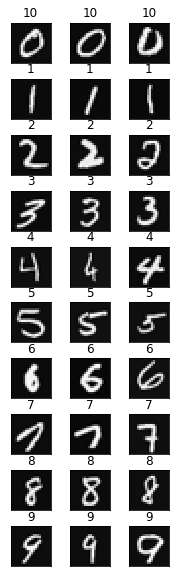

In [4]:
# plot some handwritten numbers from the mat file
rows = 10
cols = 3

sel = np.linspace(0, X.shape[0] - 1, rows * cols, dtype='int16')

plt.figure(figsize=(cols, rows))
plt.subplots_adjust(hspace=.4)


for i, idx in enumerate(sel):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[idx].reshape((20, 20), order='F'), cmap=plt.cm.gray)
    plt.title("{}".format(y[idx]))
    plt.xticks(())
    plt.yticks(())

In [7]:
# logistic regression classifier.
# With C=1.0, Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.

lg_clf = LogisticRegression(C=1.0, solver='newton-cg')
lg_clf.fit(X,y)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
lg_clf.score(X, y)

0.9446

In [14]:
# For the grid of Cs values and l1_ratios values, 
# the best hyperparameter is selected by the cross-validator 
# StratifiedKFold, but it can be changed using the cv parameter.
# selecting the best C value
lgcv_clf = LogisticRegressionCV(Cs=[1e-1, 1e0,2e0,3e0,4e0,5e0,6e0, 1e1], solver='newton-cg')
lgcv_clf.fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=[0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 10.0],
                     class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=0)

In [15]:
lgcv_clf.score(X, y)

0.9438

# Neural Net

In [18]:
# Load the weights of the pretrained network
weights = sio.loadmat('data/ml-ex3/ex3weights.mat')

theta1 = weights['Theta1']
theta2 = weights['Theta2']

print("theta 1 shape --> {}".format(theta1.shape))
print("theta 2 shape --> {}".format(theta2.shape))

theta 1 shape --> (25, 401)
theta 2 shape --> (10, 26)


In [21]:
# no of examples
n_ex = X.shape[0]

# sigmopid func
sigmoid = sc.special.expit

sigmoid

<ufunc 'expit'>

In [24]:
# build the network
# create the input layer from X
inp_ = np.c_[np.ones(n_ex), X]

# hidden layer
z_h = inp_.dot(theta1.T)
a_h = np.c_[np.ones(n_ex), sigmoid(z_h)]

# output layer
z_o = a_h.dot(theta2.T)
a_o = sigmoid(z_o)

In [27]:
# argmaxx to get predicted class
y_pred = np.argmax(a_o, axis=1) + 1

In [28]:
# get classification report
print(classification_report(y, y_pred, target_names=['1','2','3','4','5','6','7','8','9','10'], digits=4))

              precision    recall  f1-score   support

           1     0.9684    0.9820    0.9752       500
           2     0.9818    0.9700    0.9759       500
           3     0.9776    0.9600    0.9687       500
           4     0.9699    0.9680    0.9690       500
           5     0.9723    0.9840    0.9781       500
           6     0.9782    0.9860    0.9821       500
           7     0.9778    0.9700    0.9739       500
           8     0.9781    0.9820    0.9800       500
           9     0.9657    0.9580    0.9618       500
          10     0.9822    0.9920    0.9871       500

    accuracy                         0.9752      5000
   macro avg     0.9752    0.9752    0.9752      5000
weighted avg     0.9752    0.9752    0.9752      5000

